<b style="color:red">Run the cell below for a nicer layout</b>

In [91]:
from fds import *

<h1>Shark attacks!</h1>

You have already worked extensively with the shark attack dataset. This version has a few additional columns: 

<ul>
    <li><tt>Area</tt> contains a more precise description of where the incident occurred,
    <li><tt>Type</tt> a broad description of why it happened (importantly, whether the attack was provoked or not), 
    <li><tt>Injury</tt> describes the severity of the 
        injury sustained by the victim (if available),
    <li><tt>Species</tt> the shark species involved in the attack (insofar it is known),
    <li>and finally <tt>Size (min)</tt> / <tt>Size (max)</tt> an estimate of the shark's size in cm. The `min` and `max` stem from the fact that the original dataset has a rough description of the attacking shark and often estimates like &ldquo;between 5 and 7 foot&rdquo; are provided.
</ul>       

<div class="task">
    <div class="no">0</div>
    <div class="text">
        Load the dataset <code>02-resources/shark-attacks-cleaned.csv</code> using
    pandas.
    </div>
</div>

In [92]:
# Load dataset here. Hint: use the index_col argument!
import pandas as pd
data = pd.read_csv('02-resources/shark-attacks-cleaned.csv')
data

,Unnamed: 0,Year,Month,Country,Area,Type,Activity,Sex,Age,Fatal,Injury,Species,Size (min),Size (max)
0,0,2018,Jun,USA,California,Boating,Paddling,F,57.0,N,Minor,White,NaN,NaN
1,1,2018,Jun,USA,Georgia,Unprovoked,Standing,F,11.0,N,Minor,NaN,NaN,NaN
2,2,2018,Jun,USA,Hawaii,Invalid,Surfing,M,48.0,N,Minor,NaN,NaN,NaN
3,3,2018,Jun,AUSTRALIA,New South Wales,Unprovoked,Surfing,M,NaN,N,Minor,NaN,200.0,200.0
4,4,2018,Jun,MEXICO,Colima,Provoked,Free diving,M,NaN,N,Moderate,NaN,300.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,6297,0,NaN,AUSTRALIA,Western Australia,Unprovoked,Diving,M,NaN,Y,Fatal,NaN,NaN,NaN
6296,6298,0,NaN,AUSTRALIA,Western Australia,Unprovoked,Pearl diving,M,NaN,Y,Fatal,NaN,NaN,NaN
6297,6299,0,NaN,USA,North Carolina,Unprovoked,Swimming,M,NaN,Y,Fatal,NaN,NaN,NaN
6298,6300,0,NaN,PANAMA,NaN,Unprovoked,NaN,M,NaN,Y,Fatal,NaN,NaN,NaN


<h2>Dataset summary</h2>
<div class="task">
    <div class="no">1</div>
    <div class="text">Describe every column of the dataset: what type of data it is (recall our data type classification!), what values we find in it and how they are roughly distributed. Also comment on the completeness of the data.</div>
</div>


This data set provides information about shark attacks in the world. 
It gives a description of every attack that took place in the world. 
Description includes information like:
	⁃	the date of every attack (year and month),
	⁃	The location (country, area) where attacks took place, 
	⁃	The activities that the victims were doing when they were attacked, 
	⁃	victim sex and ages, 
	⁃	if the attack was fatal or not, 
	⁃	The type of injuries, 
	⁃	The shark species involved in the attack and the sizes (min or max).

Some data is missing and very incomplete like the shark species or its size.
Some information like dates also seem to be inconsistent (some cases are dated year 5, 77 or 500). 
However given the quantity of data available, the dataset is probably large enough to provide some interesting insights on shark attacks in the world.

<h2>Data exploration</h2>

<div class="task">
    <div class="no">2</div>
    <div class="text">Come up with <b>three</b> questions about the dataset
        and attempt to answer them using <code>pandas</code> and <code>matplotlib</code> (and any additional libraries you want to use).
    </div>
</div>

<h3>Question 1: What are the 10 countries with more attacks?</h3>

<div style="text-align: center; margin: 3em 6em">The question is looking to identify the top 10 countries with the highest number of shark attacks in the last 50 years. With this analysis we can provide an insight into the distribution of shark attacks and even highlight the regions where certain factor may contribute to higher incidents. The focus here is to help up analyse recent trends and patterns in the shark attacks, which can be helpful for understand the risks and factors contributing to these incidents.
</div>

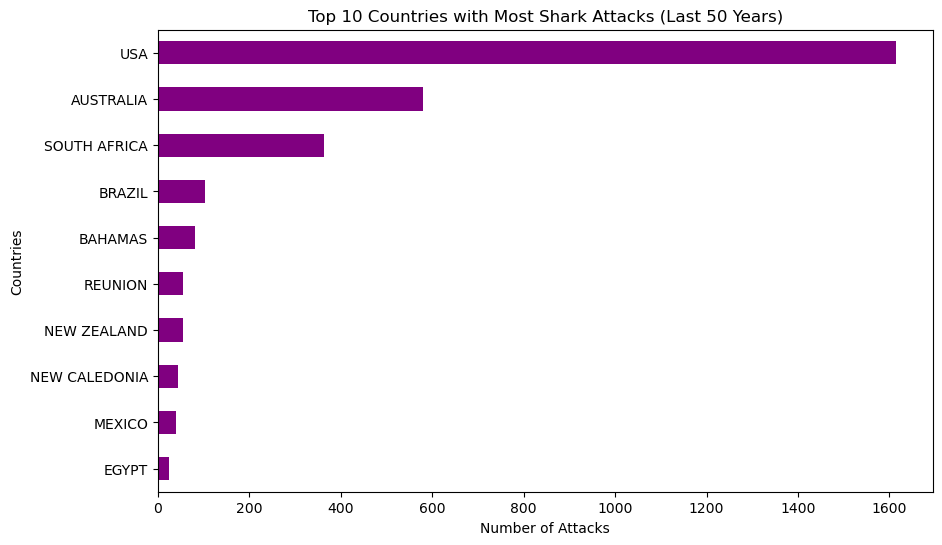

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('02-resources/shark-attacks-cleaned.csv')

# i just told the data that i wanted limitate the years to 50 so i just filtered that.
data_50_years = data[data['Year'] > 1968]


#The count of shark attacks by country in the last 50 years
shark_attacks_country = data_50_years['Country'].value_counts().head(10) # i have limitated to only
                                                                # 10 countries which is a fair number

# Create horizontal bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
shark_attacks_country.plot(kind='barh', color='purple')
plt.xlabel('Number of Attacks') #label 1
plt.ylabel('Countries') #label 2
plt.title('Top 10 Countries with Most Shark Attacks (Last 50 Years)') #label 3
plt.gca().invert_yaxis()  # inverted so its easier to read an analyse
plt.show()

# Question 1: What did we learned from that?
The horizontal bar I’ve created effectively visualize the top 10 countries with the most shark attacks. Each bar represents a country, and its length correspond to the number of shark attacks in that country, i used the countries and year rows from the original data set so i could get a better analysis.

The USA start as the top country with the highest number of shark attacks in the last 50 years, this is notable if you consider the vast coastline of the US which provide an ample habitat for various shark species. But why is there more shark attacks there? I have done some research and I found that the due to changes in ocean temperature, some shark species like the great white will migrate to warmer water when water temperature starts to fall. The water temperature, in some locations, has been unseasonably warm and some scientists theorize it’s been keeping sharks in the area and closer to the shore.

While Australia remains a prominent location for shark attacks, the fact that the US lead suggests that factors such conditional play significant role in shaping shark attack statistic. Countries like US and Australia are known for their vibrant surfing cultures and coastal tourism, may experience higher incidences of shark attacks due to increased human activity in the water. The best way to handle this is educating surfers and tourist/beachgoers about shark behaviour and maybe implementing some safety protocols that can help reduce the risks.

<h3>Question 2: Have the attacks been decreasing lately?</h3>

<div style="text-align: center; margin: 3em 6em">With this question we are aiming to understand whether there has been a trend in the number of shark attacks over the last 50 years. This analysis can help us to get an insight into potential changes in shark-human interaction and also help discussions around beach safety and conservation efforts.</div>

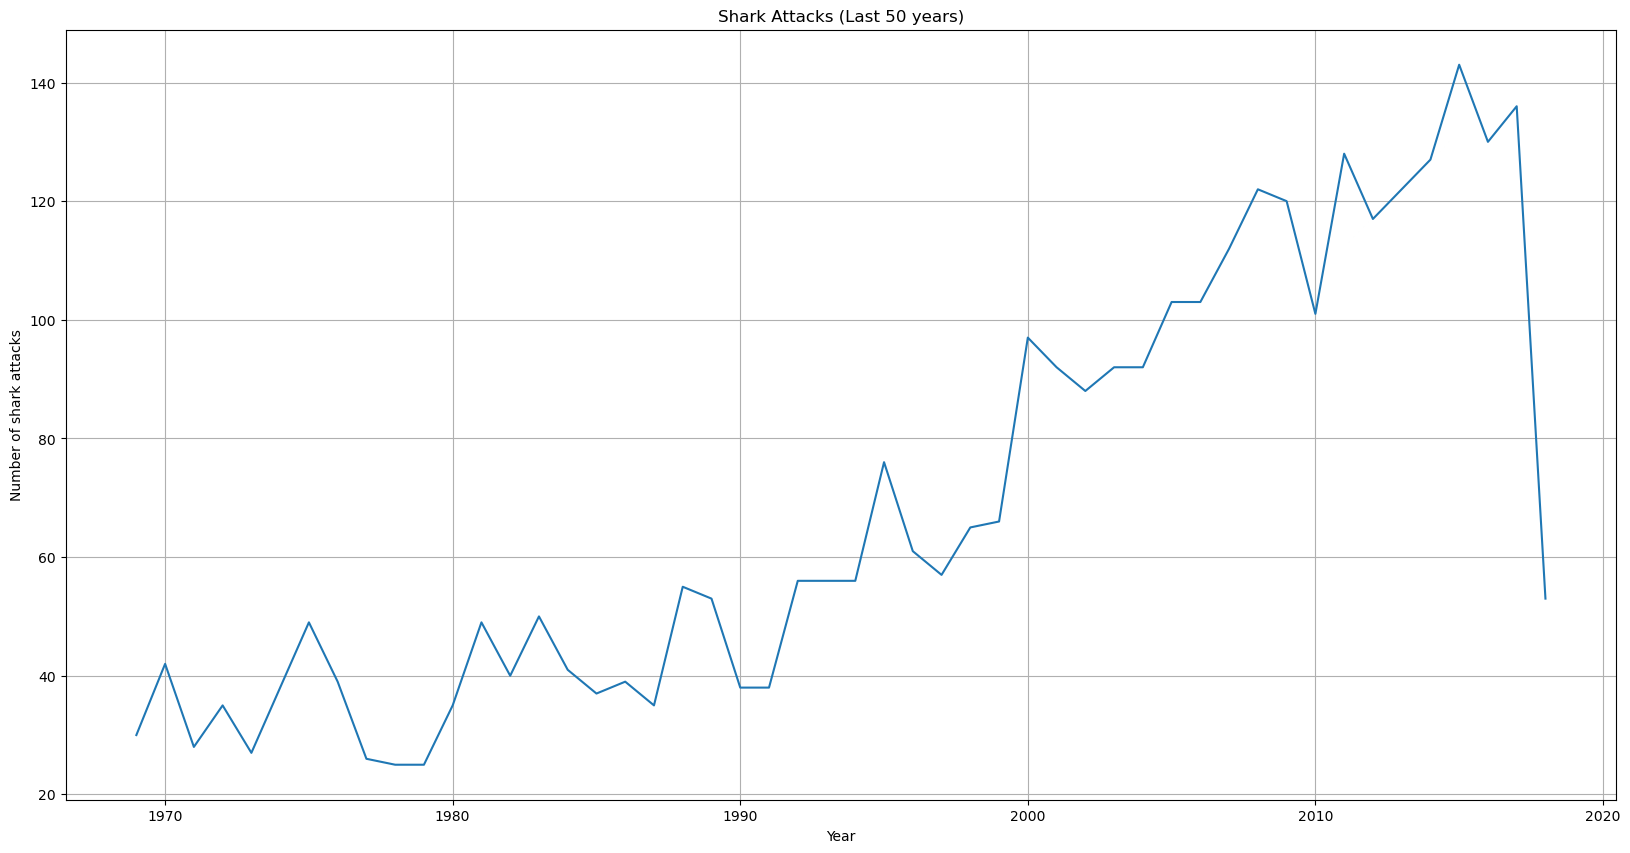

In [122]:
import matplotlib.pyplot as plt

data_50_years = data[data['Year'] > 1968] # using the year row and limitating to only 50 years
sharks_yearly = data_50_years['Year'].value_counts().sort_index() #sorting the infomationa and organizing

plt.figure(figsize=(20, 10))
plt.plot(sharks_yearly.index, sharks_yearly.values)

plt.title('Shark Attacks (Last 50 years)') #label 1
plt.xlabel('Year') # label 2
plt.ylabel('Number of shark attacks') #label 3
plt.grid(True)
plt.show()

# Question 2: What did we learned from that?
With this plot I created a display for the number of shark attacks on a yearly basis over the last 50 years. On this question I used the Year and Injuries rows from the dataset so I could get a more accurate plot with as much info as possible.

Now, let's dive into some analysis and interesting insights based on the plot.
Just on the visual inspect of the plot, we can see whether there is a big trend in the frequency of shark attacks over the last 50 years. This could help us decide if there has been a significant increase, decrease or relatively stable pattern over time.

With the info that we got from the previous question we can safely assume that due to various environmental and ecological factors are playing a big role on these attacks, and we also have the human behaviour may influence the frequency of shark attacks. Using the plot along historical events can help us identify correlations and potential causative factors.

Shark attacks often get plenty of media attention which lead to public perception that they are increasing even if the data suggest otherwise. Using this data we maybe help the public to see the evidence and understand more why and when this is happening. 

The plot shows us a decreasing trend on the last couple of years which indicates successful conservation effort and improved beach safety measures implemented in recent years.

Unfortunately on the last 2 years we've been having a sadly increase on shark attacks. Australia is a house for the deadly attacks, in 2023 we had 10 fatal attacks which is the double of the previous year (The Guardian "Global shark bite deaths doubled in 2023 with 40% occurring in Australia" Feb 2024)


<h3>Question 3: How bad was the shark attacks? </h3>

<div style="text-align: center; margin: 3em 6em">With this question we are looking to understand the severity of shark attacks by examining the type of injuries experienced by victims. This analysis could be out light to see the range of injuries by examining the distribution of injuries, we can get more info into the range of outcomes of these incidents and see how serious these attacks have been.</div>

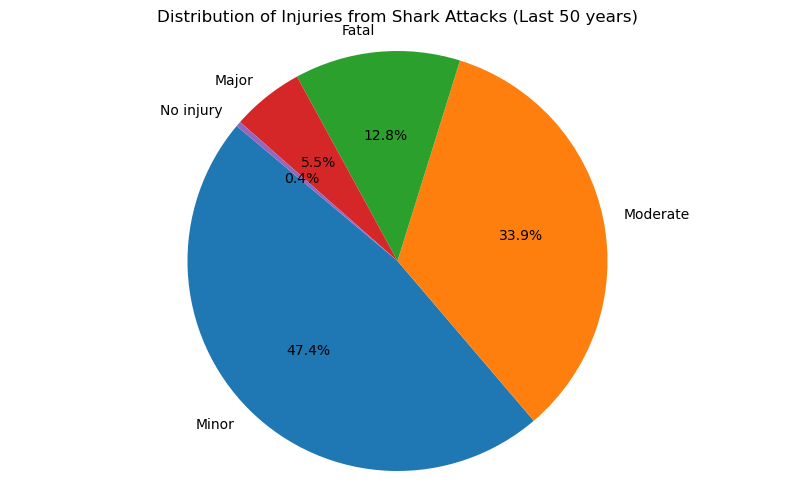

In [128]:
import matplotlib.pyplot as plt

#only using the last 50 years and the previous questions
data_50_years = data[data['Year'] > 1968]

# Count occurrences of each injury
injury_counts = data_50_years['Injury'].value_counts()

# Plot the data as a pie chart as this is the best way to plot injuries and accidents.
plt.figure(figsize=(10, 6))
plt.pie(injury_counts, labels=injury_counts.index, autopct='%1.1f%%', startangle=140)
# autopct='%1.1f%%' formats the percentage labels with one decimal place
# startangle=140 rotates the pie chart to start at 140 degrees
plt.title('Distribution of Injuries from Shark Attacks (Last 50 years)')
plt.axis('equal')  # Equal is to ensure that the pie is drawn as a circle.
plt.show()

# Question 2: What did we learned from that?
With this plot we have focused on the subset of the dataset of injuries. We will only focus on the last 50 years, so we have a better analysis. We have used the pie chart display which provides a visual representation of the severity distribution of injuries sustained in shark attacks, we can see the size of the slices and see all the type of injuries.

This is interesting if you compare the distribution of injuries with the previous questions, as you can see, we had plenty of attacks but happily more than 40% have been minor, and hopefully by implementing some security protocols these attacks will become less often.

We can also compare this with the public perception of shark attacks severity, usually influenced by media reports, with this distribution of injuries we can highlight the discrepancies and stop the myths and misconceptions surrounding shark attacks.

"The total number of unprovoked shark bites worldwide remains extremely low. Fatalities saw an increase over the past year. Most of the fatalities in 2023 were due to white shark bites (three in Australia, one in California).
ISAF offers resources for reducing your risk of a shark bite and instructions for what to do if you encounter a shark." Florida Museum Of Natural History, 'Yearly Worldwide Shark Attack Summary'

Understanding the distribution of injuries can help with beach safety strategies and public awareness campaigns aimed at minimizing the severity of shark attacks. Highlighting preventive measures and promoting safe practices can help minimizing the risk of injuries and making the beach a safer place.